In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [40]:
# loading dataset
penguins = pd.read_csv("penguins.csv")

# printing first five rows
print(penguins.head())

# checking for any missing values
print(penguins.isnull().sum())

# dropping missing valued rows 
penguins.dropna(inplace=True)

# printing shape 
print(penguins.shape)

# printing main statistics
#print(penguins.describe())



  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
(333, 8)
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean       

In [41]:
#data description 

def understand_data(data) :
    return(pd.DataFrame({"Datatype":penguins.dtypes,
                         "No of NAs":penguins.isna().sum(),
                         "No of Levels":penguins.apply(lambda x: x.nunique(),axis=0),
                         "Levels":penguins.apply(lambda x: str(x.unique()),axis=0)}))

understand_data(penguins)

,Datatype,No of NAs,No of Levels,Levels
species,object,0,3,['Adelie' 'Gentoo' 'Chinstrap']
island,object,0,3,['Torgersen' 'Biscoe' 'Dream']
bill_length_mm,float64,0,163,[39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 ...
bill_depth_mm,float64,0,79,[18.7 17.4 18. 19.3 20.6 17.8 19.6 17.6 21.2 ...
flipper_length_mm,float64,0,54,[181. 186. 195. 193. 190. 182. 191. 198. 185. ...
body_mass_g,float64,0,93,[3750. 3800. 3250. 3450. 3650. 3625. 4675. 320...
sex,object,0,2,['male' 'female']
year,int64,0,3,[2007 2008 2009]


In [11]:
# converting categorical colunms to numeric values

penguins["species"] = pd.Categorical(penguins["species"]).codes
penguins["island"] = pd.Categorical(penguins["island"]).codes
penguins["sex"] = pd.Categorical(penguins["sex"]).codes

print(penguins.species)
print(penguins.island)
print(penguins.sex)

0      0
1      0
2      0
4      0
5      0
      ..
339    1
340    1
341    1
342    1
343    1
Name: species, Length: 333, dtype: int8
0      2
1      2
2      2
4      2
5      2
      ..
339    1
340    1
341    1
342    1
343    1
Name: island, Length: 333, dtype: int8
0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int8


In [12]:
# finding minimum and maximum values for every column

print(penguins.describe())
print('\n')
minimum_bill_length_mm,maximum_bill_length_mm = penguins["bill_length_mm"].min(),penguins["bill_length_mm"].max()
# print(minimum_bill_length_mm)
# print(maximum_bill_length_mm)

minimum_bill_depth_mm,maximum_bill_depth_mm = penguins["bill_depth_mm"].min(),penguins["bill_depth_mm"].max()
# print(minimum_bill_depth_mm)
# print(maximum_bill_depth_mm)

minimum_flipper_length_mm,maximum_flipper_length_mm = penguins["flipper_length_mm"].min(),penguins["flipper_length_mm"].max()
# print(minimum_flipper_length_mm)
# print(maximum_flipper_length_mm)

minimum_body_mass_g,maximum_body_mass_g = penguins["body_mass_g"].min(),penguins["body_mass_g"].max()
# print(minimum_body_mass_g)
# print(maximum_body_mass_g)

# rescaling columns to binary range

penguins["bill_length_mm"] = (penguins["bill_length_mm"] - minimum_bill_length_mm) / (maximum_bill_length_mm - minimum_bill_length_mm)
penguins["bill_depth_mm"] = (penguins["bill_depth_mm"] - minimum_bill_depth_mm) / (maximum_bill_depth_mm - minimum_bill_depth_mm)
penguins["flipper_length_mm"] = (penguins["flipper_length_mm"] - minimum_flipper_length_mm) / (maximum_flipper_length_mm - minimum_flipper_length_mm)
penguins["body_mass_g"] = (penguins["body_mass_g"] - minimum_body_mass_g) / (maximum_body_mass_g - minimum_body_mass_g)

          species      island  bill_length_mm  bill_depth_mm  \
count  333.000000  333.000000      333.000000     333.000000   
mean     0.918919    0.651652       43.992793      17.164865   
std      0.889718    0.714715        5.468668       1.969235   
min      0.000000    0.000000       32.100000      13.100000   
25%      0.000000    0.000000       39.500000      15.600000   
50%      1.000000    1.000000       44.500000      17.300000   
75%      2.000000    1.000000       48.600000      18.700000   
max      2.000000    2.000000       59.600000      21.500000   

       flipper_length_mm  body_mass_g         sex         year  
count         333.000000   333.000000  333.000000   333.000000  
mean          200.966967  4207.057057    0.504505  2008.042042  
std            14.015765   805.215802    0.500732     0.812944  
min           172.000000  2700.000000    0.000000  2007.000000  
25%           190.000000  3550.000000    0.000000  2007.000000  
50%           197.000000  4050.00

In [13]:
Y = penguins["sex"]
Y

0      1
1      0
2      0
4      0
5      1
      ..
339    1
340    0
341    1
342    1
343    0
Name: sex, Length: 333, dtype: int8

In [14]:
X = penguins.drop("sex", axis=1)
X

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0,2,0.254545,0.666667,0.152542,0.291667,2007
1,0,2,0.269091,0.511905,0.237288,0.305556,2007
2,0,2,0.298182,0.583333,0.389831,0.152778,2007
4,0,2,0.167273,0.738095,0.355932,0.208333,2007
5,0,2,0.261818,0.892857,0.305085,0.263889,2007
...,...,...,...,...,...,...,...
339,1,1,0.861818,0.797619,0.593220,0.361111,2009
340,1,1,0.414545,0.595238,0.508475,0.194444,2009
341,1,1,0.636364,0.607143,0.355932,0.298611,2009
342,1,1,0.680000,0.702381,0.644068,0.388889,2009


In [15]:
# divide the dataset into training and test, as 80% training, 20% testing dataset

train_size = int(0.8 * len(penguins))

X_train = X[:train_size]
print(X_train)
y_train = Y[:train_size]
print(y_train)
X_test = X[train_size:]
print(X_test)
y_test = Y[train_size:]
print(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2        0.254545       0.666667           0.152542   
1          0       2        0.269091       0.511905           0.237288   
2          0       2        0.298182       0.583333           0.389831   
4          0       2        0.167273       0.738095           0.355932   
5          0       2        0.261818       0.892857           0.305085   
..       ...     ...             ...            ...                ...   
272        2       0        0.534545       0.142857           0.728814   
273        2       0        0.665455       0.309524           0.847458   
274        2       0        0.476364       0.202381           0.677966   
275        2       0        0.647273       0.357143           0.694915   
276        1       1        0.523636       0.571429           0.338983   

     body_mass_g  year  
0       0.291667  2007  
1       0.305556  2007  
2       0.152778  2007  
4       0.2

In [38]:
import numpy as np

class LogitRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        #print(model.learning_rate)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        self.weights = np.random.uniform(0, 1, size=X.shape[1])
        self.loss = []
        for i in range(self.iterations):
            y_pred = self.sigmoid(X.dot(self.weights))
            error = y_pred - y
            gradient = X.T.dot(error) / len(y)
            self.weights -= self.learning_rate * gradient
            self.loss.append(np.mean(error ** 2))
            print(list(enumerate(model.loss)))
    
    def predict(self, X):
        y_pred = self.sigmoid(X.dot(self.weights))
        return (y_pred > 0.5).astype(int)
        


In [17]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

# # Load the penguins dataset
# data = load_iris()

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# # Initialize and train the model
# model = LogitRegression(learning_rate=1e-6, iterations=100000)
# model.fit(X_train, y_train)


In [18]:
# # Make predictions on the testing set
# y_pred = model.predict(X_test)

# # Calculate the accuracy
# accuracy = np.mean(y_pred == y_test)
# print("Accuracy: {:.2f}%".format(accuracy * 100))


In [33]:
learning_rates = [1e-6]
#learning_rates = [1e-6,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]
for learning_rate in learning_rates:
    model = LogitRegression(learning_rate=learning_rate, iterations=1010)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print("Learning rate: {:.0e}, Accuracy: {:.2f}%".format(learning_rate, accuracy * 100))
    #print(y_pred)


Learning rate: 1e-06, Accuracy: 85.07%


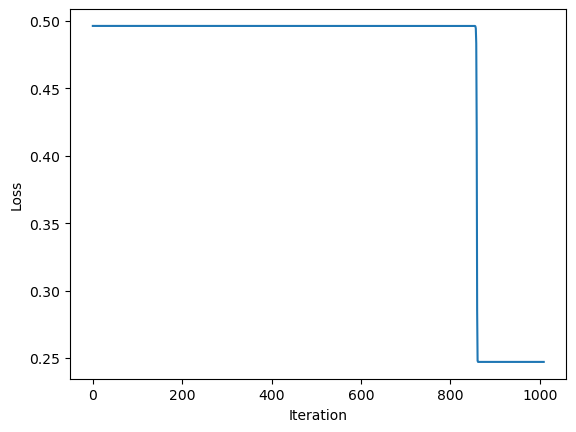

In [34]:
import matplotlib.pyplot as plt
# Plot the loss over each iteration
plt.plot(model.loss)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()



In [35]:
pickle.dump(model.weights, open("NK_BM_Assignment1c1.pickle", "wb" ))

In [39]:
learning_rates = [1e-6]
#learning_rates = [1e-6,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]
for learning_rate in learning_rates:
    model = LogitRegression(learning_rate=learning_rate, iterations=1010)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print("Learning rate: {:.0e}, Accuracy: {:.2f}%".format(learning_rate, accuracy * 100))
    #print(y_pred)

[(0, 0.49624060150375937)]
[(0, 0.49624060150375937), (1, 0.49624060150375937)]
[(0, 0.49624060150375937), (1, 0.49624060150375937), (2, 0.49624060150375937)]
[(0, 0.49624060150375937), (1, 0.49624060150375937), (2, 0.49624060150375937), (3, 0.49624060150375937)]
[(0, 0.49624060150375937), (1, 0.49624060150375937), (2, 0.49624060150375937), (3, 0.49624060150375937), (4, 0.49624060150375937)]
[(0, 0.49624060150375937), (1, 0.49624060150375937), (2, 0.49624060150375937), (3, 0.49624060150375937), (4, 0.49624060150375937), (5, 0.49624060150375937)]
[(0, 0.49624060150375937), (1, 0.49624060150375937), (2, 0.49624060150375937), (3, 0.49624060150375937), (4, 0.49624060150375937), (5, 0.49624060150375937), (6, 0.49624060150375937)]
[(0, 0.49624060150375937), (1, 0.49624060150375937), (2, 0.49624060150375937), (3, 0.49624060150375937), (4, 0.49624060150375937), (5, 0.49624060150375937), (6, 0.49624060150375937), (7, 0.49624060150375937)]
[(0, 0.49624060150375937), (1, 0.49624060150375937), (2,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[(0, 0.49624060150375937), (1, 0.49624060150375937), (2, 0.49624060150375937), (3, 0.49624060150375937), (4, 0.49624060150375937), (5, 0.49624060150375937), (6, 0.49624060150375937), (7, 0.49624060150375937), (8, 0.49624060150375937), (9, 0.49624060150375937), (10, 0.49624060150375937), (11, 0.49624060150375937), (12, 0.49624060150375937), (13, 0.49624060150375937), (14, 0.49624060150375937), (15, 0.49624060150375937), (16, 0.49624060150375937), (17, 0.49624060150375937), (18, 0.49624060150375937), (19, 0.49624060150375937), (20, 0.49624060150375937), (21, 0.49624060150375937), (22, 0.49624060150375937), (23, 0.49624060150375937), (24, 0.49624060150375937), (25, 0.49624060150375937), (26, 0.49624060150375937), (27, 0.49624060150375937), (28, 0.49624060150375937), (29, 0.49624060150375937), (30, 0.49624060150375937), (31, 0.49624060150375937), (32, 0.49624060150375937), (33, 0.49624060150375937), (34, 0.49624060150375937), (35, 0.49624060150375937), (36, 0.49624060150375937), (37, 0.496

In [ ]:
## The above obtained loss values are for accuracy 68.66. As I have achieved highest accuracy while running code for different parameters I could not get loss values for highest accuracy iterations. But the values remained same, just the change of values is at different number of iterations according to loss graph.